In [12]:
import torch
import yaml
from utils import set_seed

set_seed()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

with open("square_segmentation_dataset/config.yaml", 'r') as f:
    dataset_config = yaml.safe_load(f)

print("Dataset configuration loaded!")

Using device: cuda
Dataset configuration loaded!


Train samples: 210
Validation samples: 45
Test samples: 45
Training samples:


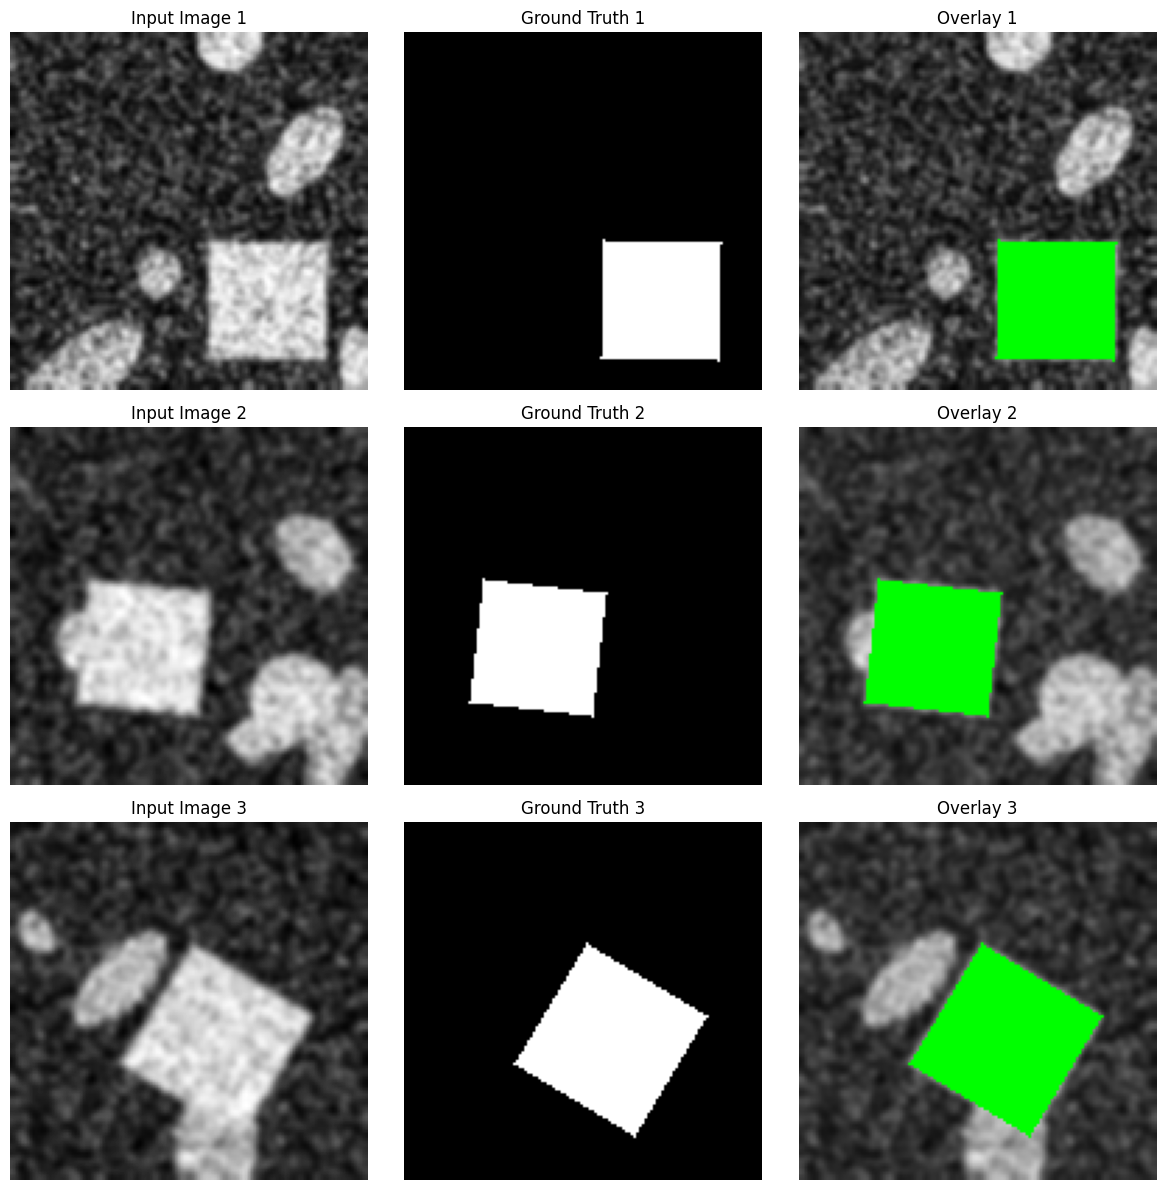

In [13]:
from utils import visualize_samples
from dataset import get_dataloaders

# Initialize dataloaders
data_dir = dataset_config['dataset']['path']
train_loader, val_loader, test_loader = get_dataloaders(data_dir)

# Display dataset sizes
print(f"Train samples: {len(train_loader.dataset)}")
print(f"Validation samples: {len(val_loader.dataset)}")
print(f"Test samples: {len(test_loader.dataset)}")


# Visualize training samples
print("Training samples:")
visualize_samples(train_loader)

In [6]:
from utils import get_model, test_model
model_config = {
    'base_filters': 16,
    'bilinear': True,
    'depth': 3
}

# Initialize and test model
model = get_model(model_config, device=device)
test_model(model, device=device)

Input shape: torch.Size([1, 1, 128, 128])
Output shape: torch.Size([1, 1, 128, 128])
Total parameters: 487,713


torch.Size([1, 1, 128, 128])

In [8]:
from train_utils import train_model
from model import DiceLoss

train_config = {
    'learning_rate': 0.0005,
    'weight_decay': 1e-5,
    'batch_size': 16,
    'num_epochs': 50,
    'patience': 10
}

# Initialize optimizer, loss and scheduler
model = get_model(model_config, device=device)
criterion = DiceLoss()
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=train_config['learning_rate'],
    weight_decay=train_config['weight_decay']
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)

# Train model
print("Starting training...")
model, history = train_model(
    model, train_loader, val_loader, optimizer, criterion,
    scheduler=scheduler, 
    num_epochs=train_config['num_epochs'],
    patience=train_config['patience'],
    device=device
)

c:\Users\joewh\miniconda3\envs\stitch-o\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Starting training...
Epoch [5/50] - Train loss: 0.4716 - Train acc: 0.9624 - Val loss: 0.4128 - Val acc: 0.9513 - Val F1: 0.8746 - Val IoU: 0.7780
Epoch [10/50] - Train loss: 0.2875 - Train acc: 0.9744 - Val loss: 0.2306 - Val acc: 0.9756 - Val F1: 0.9310 - Val IoU: 0.8726
Epoch [15/50] - Train loss: 0.1741 - Train acc: 0.9801 - Val loss: 0.1529 - Val acc: 0.9776 - Val F1: 0.9365 - Val IoU: 0.8819
Epoch [20/50] - Train loss: 0.1275 - Train acc: 0.9810 - Val loss: 0.1231 - Val acc: 0.9744 - Val F1: 0.9277 - Val IoU: 0.8662
Epoch [25/50] - Train loss: 0.0872 - Train acc: 0.9864 - Val loss: 0.0846 - Val acc: 0.9842 - Val F1: 0.9527 - Val IoU: 0.9102
Epoch [30/50] - Train loss: 0.0614 - Train acc: 0.9906 - Val loss: 0.0588 - Val acc: 0.9892 - Val F1: 0.9671 - Val IoU: 0.9366
Epoch [35/50] - Train loss: 0.0514 - Train acc: 0.9913 - Val loss: 0.0580 - Val acc: 0.9868 - Val F1: 0.9612 - Val IoU: 0.9259
Epoch [40/50] - Train loss: 0.0430 - Train acc: 0.9921 - Val loss: 0.0620 - Val acc: 0.9828

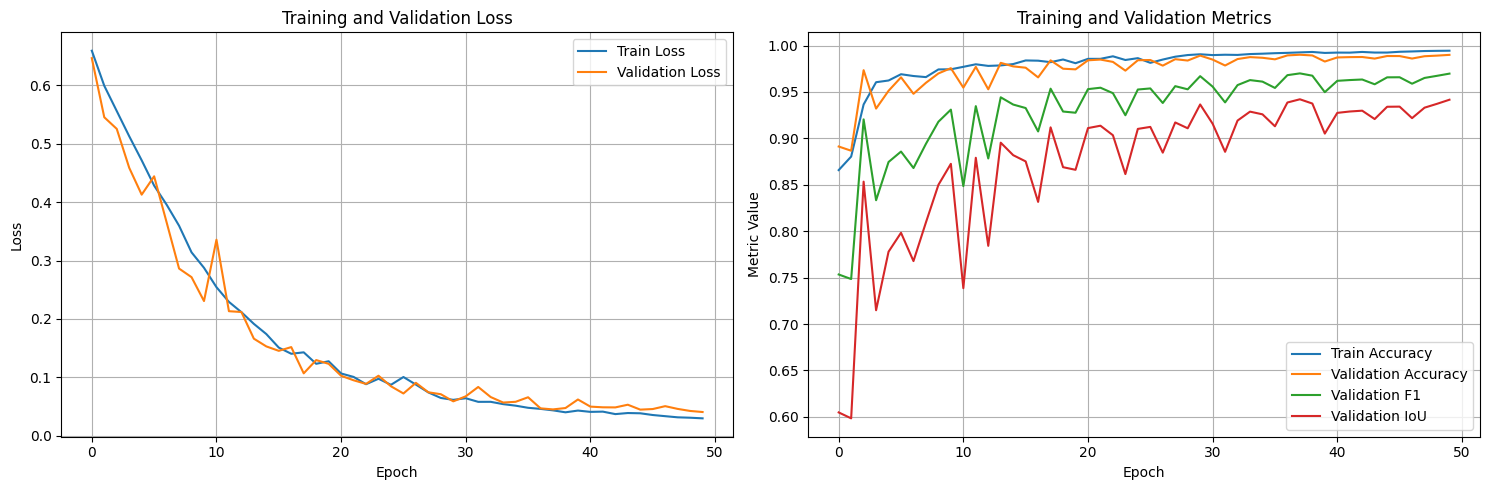

In [9]:
from utils import plot_history
plot_history(history)

Test set evaluation:
  loss: 0.0634
  accuracy: 0.9846
  f1_score: 0.9475
  iou_score: 0.9013
Predictions on test set:


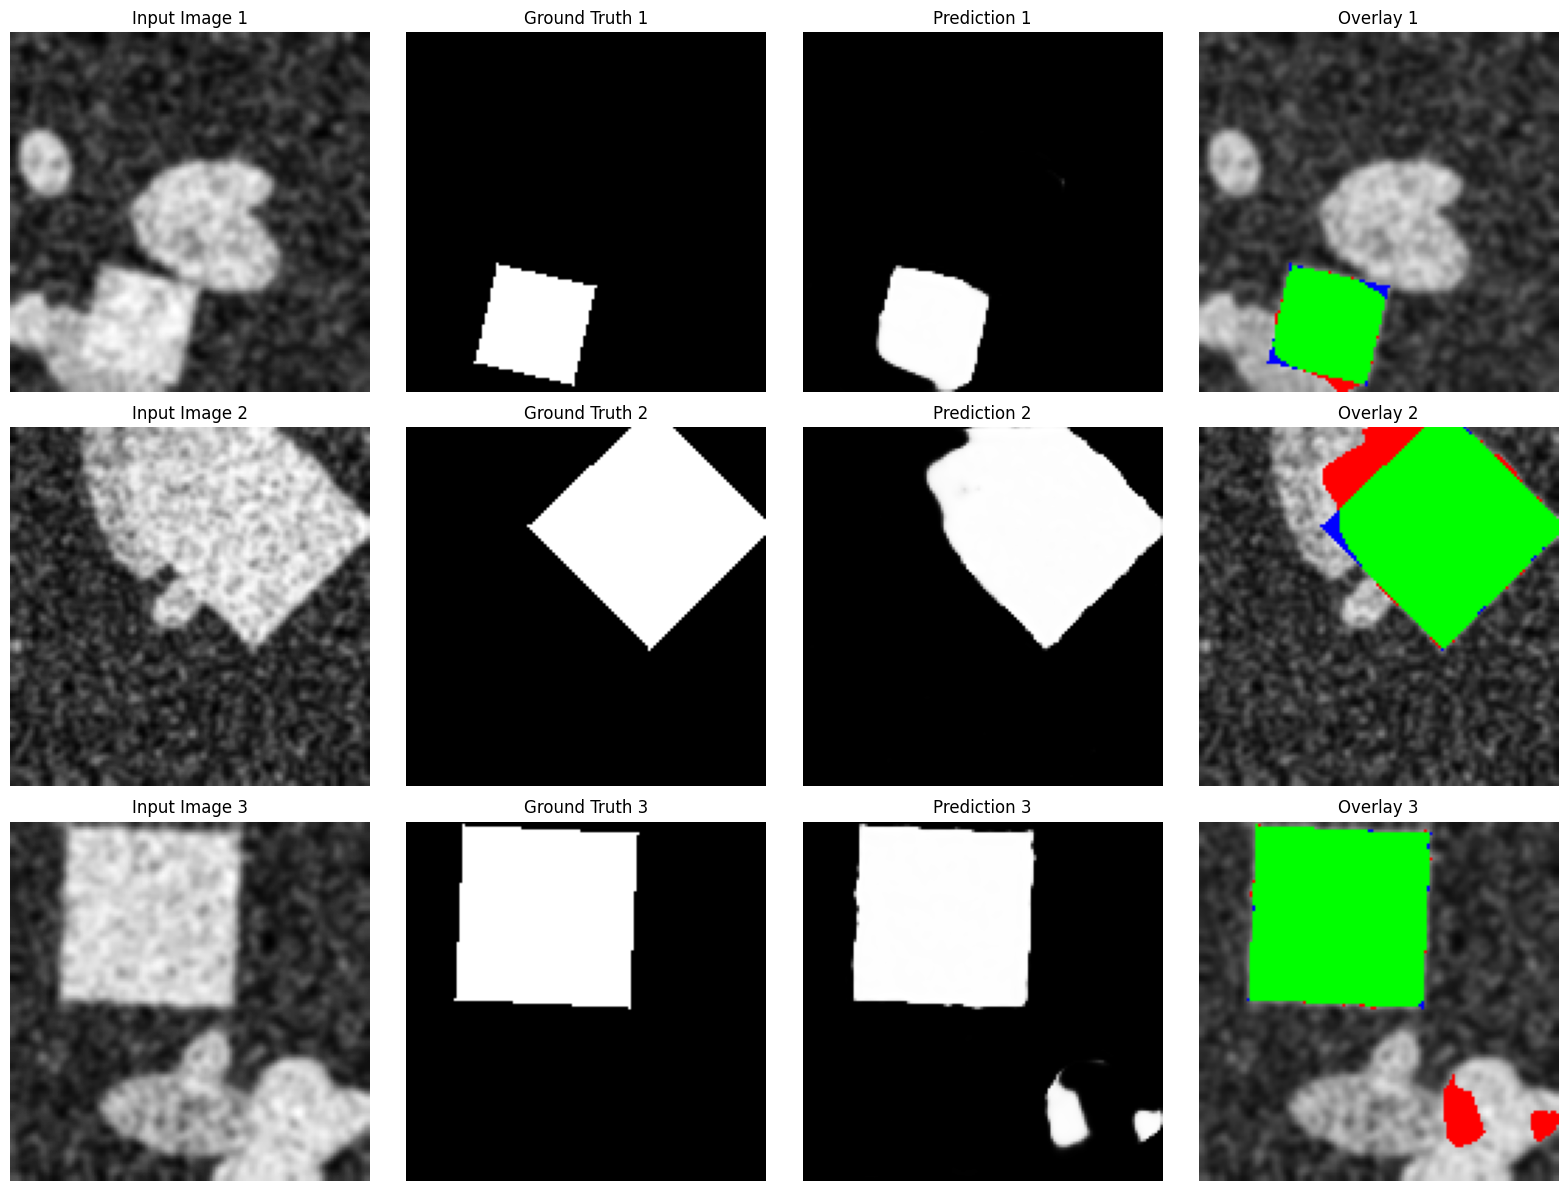

In [10]:
from train_utils import evaluate 
from utils import visualize_predictions

test_metrics = evaluate(model, test_loader, criterion, device)
print("Test set evaluation:")
for metric, value in test_metrics.items():
    print(f"  {metric}: {value:.4f}")

# Visualize predictions
print("Predictions on test set:")
visualize_predictions(model, test_loader, device=device)

In [ ]:
from utils import save_model, load_model

# Save trained model
save_model(model, model_config, train_config, history)

print("Training and evaluation complete!")

Model saved to mini_unet_model.pth
Training and evaluation complete!
